# Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%reload_ext autoreload
%autoreload 2

from types import SimpleNamespace
from data_provider.data_factory import data_provider
from tabular.dl_logs import logs_summary, exp_summary, mean_std_logs_summary, latex_display_table_with_std, highlight_values, CALMIP_START_INDEX

In [2]:
summary_df = mean_std_logs_summary()
summary_df.round(2)

test 14934
test 13382
test 12006
test 9629
test 7729


time                                 16-16         24-24       32-32        \
                                      mean   std    mean   std  mean   std   
model                       features                                         
Transformer                 MS        0.53  0.02    0.89  0.03  1.25  0.05   
TimesNet                    S         1.28  0.00     NaN   NaN  3.07  0.01   
LSTM                        MS        1.33  0.02    1.96  0.01  2.47  0.03   
Nonstationary_Transformer   S         1.28  0.01    2.21  0.02  3.05  0.02   
Transformer                 S         1.27  0.00    2.19  0.02  3.02  0.01   
iTransformer                S         1.26  0.01    2.18  0.01  3.03  0.00   
PatchTST                    S         1.35  0.03    2.32  0.02  3.16  0.02   
DLinear                     S         1.41  0.00    2.38  0.00  3.24  0.00   
LSTM                        S         1.60  0.00    2.46  0.02  3.25  0.01   
Baseline - StandStill       S         2.63  0.00    3.67  0.00  4.49  0.00   
Baseline - ConstantVelocity S         1.52  0.00    2.75  0.00  4.05  0.00   
PatchTST                    MS         NaN   NaN   77.17  1.63   NaN   NaN   
DLinear                     MS         NaN   NaN  100.09  0.97   NaN   NaN   

time                                 48-48       64-64       Average  
                                      mean   std  mean   std    mean  
model                       features                                  
Transformer                 MS        1.78  0.01   NaN   NaN    1.11  
TimesNet                    S          NaN   NaN   NaN   NaN    2.17  
LSTM                        MS        3.43  0.09   NaN   NaN    2.30  
Nonstationary_Transformer   S         4.31  0.07   NaN   NaN    2.72  
Transformer                 S         4.28  0.00  5.06  0.01    3.17  
iTransformer                S         4.37  0.07  5.13  0.01    3.19  
PatchTST                    S         4.44  0.09  5.20  0.06    3.29  
DLinear                     S         4.47  0.00  5.11  0.01    3.32  
LSTM                        S         4.42  0.01  5.14  0.02    3.37  
Baseline - StandStill       S         5.55  0.00  5.98  0.00    4.46  
Baseline - ConstantVelocity S         6.55  0.00  8.85  0.00    4.74  
PatchTST                    MS         NaN   NaN   NaN   NaN   77.17  
DLinear                     MS         NaN   NaN   NaN   NaN  100.09

In [3]:
ts_mean_std_latex = latex_display_table_with_std(summary_df, n_highlighted_values=3)
ts_mean_std_latex.to_latex('../Collective_behavior/latex/presentations/ts_mean_std_latex.tex', index = False, float_format = "%.2f")
ts_mean_std_latex

,model,features,16-16,24-24,32-32,48-48,64-64
0,Transformer,MS,\textbf{0.53 $\pm$ 0.02},\textbf{0.89 $\pm$ 0.03},\textbf{1.25 $\pm$ 0.05},\textbf{1.78 $\pm$ 0.01},nan $\pm$ nan
1,TimesNet,S,1.28 $\pm$ 0.00,nan $\pm$ nan,3.07 $\pm$ 0.01,nan $\pm$ nan,nan $\pm$ nan
2,LSTM,MS,1.33 $\pm$ 0.02,\textbf{1.96 $\pm$ 0.01},\textbf{2.47 $\pm$ 0.03},\textbf{3.43 $\pm$ 0.09},nan $\pm$ nan
3,Nonstationary Transformer,S,1.28 $\pm$ 0.01,2.21 $\pm$ 0.02,3.05 $\pm$ 0.02,4.31 $\pm$ 0.07,nan $\pm$ nan
4,Transformer,S,\textbf{1.27 $\pm$ 0.00},2.19 $\pm$ 0.02,\textbf{3.02 $\pm$ 0.01},\textbf{4.28 $\pm$ 0.00},\textbf{5.06 $\pm$ 0.01}
5,iTransformer,S,\textbf{1.26 $\pm$ 0.01},\textbf{2.18 $\pm$ 0.01},3.03 $\pm$ 0.00,4.37 $\pm$ 0.07,\textbf{5.13 $\pm$ 0.01}
6,PatchTST,S,1.35 $\pm$ 0.03,2.32 $\pm$ 0.02,3.16 $\pm$ 0.02,4.44 $\pm$ 0.09,5.20 $\pm$ 0.06
7,DLinear,S,1.41 $\pm$ 0.00,2.38 $\pm$ 0.00,3.24 $\pm$ 0.00,4.47 $\pm$ 0.00,\textbf{5.11 $\pm$ 0.01}
8,LSTM,S,1.60 $\pm$ 0.00,2.46 $\pm$ 0.02,3.25 $\pm$ 0.01,4.42 $\pm$ 0.01,5.14 $\pm$ 0.02
9,Baseline - StandStill,S,2.63 $\pm$ 0.00,3.67 $\pm$ 0.00,4.49 $\pm$ 0.00,5.55 $\pm$ 0.00,5.98 $\pm$ 0.00


# <span style='color:lightgreen'>Logs

### Consolidated logs

In [7]:
rdf = exp_summary([16,24,32,48,64,96], sort_col='fde', run = 2)
rdf.round(2)

test 14934
test 13382
test 12006
test 9629
test 7729
test 4944


seq_len                        model features 16_16       24_24       32_32  \
metrics                                         fde  rmse   fde  rmse   fde   
2                               LSTM        S  1.59  0.94  2.45  1.43  3.23   
1              Baseline - StandStill        S  2.63  1.62  3.67  2.27  4.49   
0        Baseline - ConstantVelocity        S  1.52  0.80  2.75  1.44  4.05   

seq_len       48_48       64_64        96_96       Average        
metrics  rmse   fde  rmse   fde  rmse    fde  rmse     fde  rmse  
2        1.89  4.40  2.68   NaN   NaN    NaN   NaN    2.92  1.73  
1        2.81  5.55  3.57  5.98  3.91   7.07  4.61    4.90  3.13  
0        2.14  6.55  3.57  8.85  4.95  12.56  7.14    6.05  3.34

In [ ]:
old_rdf = exp_summary([16,24,32,48,64,96], sort_col='fde', run = 1)
old_rdf.round(2).dropna()

test 14934
test 13382
test 12006
test 9629
test 7729
test 4944


seq_len                        model features 16_16       24_24       32_32  \
metrics                                         fde  rmse   fde  rmse   fde   
15                       Transformer       MS  1.29  0.72  2.09  1.17  2.93   
16                       Transformer        S  1.30  0.71  2.19  1.21  2.94   
11                            ST_GAT       MS  1.38  0.78  2.29  1.33  2.82   
7          Nonstationary_Transformer        S  1.33  0.73  2.21  1.22  2.97   
18                      iTransformer        S  1.29  0.70  2.15  1.18  2.94   
9                           PatchTST        S  1.37  0.77  2.24  1.25  2.96   
3                            DLinear        S  1.37  0.75  2.26  1.24  3.02   
4                               LSTM       MS  1.57  0.92  2.35  1.41  3.00   
5                               LSTM        S  1.54  0.90  2.37  1.37  3.04   
10                         SABFormer       MS  2.20  1.36  3.03  1.88  2.85   
6          Nonstationary_Transformer       MS  2.15  1.32  3.11  1.91  3.79   
17                      iTransformer       MS  2.32  1.44  3.20  1.99  3.84   
8                           PatchTST       MS  2.36  1.46  3.23  2.01  3.88   
2                            DLinear       MS  2.36  1.46  3.23  2.01  3.88   
1              Baseline - StandStill        S  2.63  1.62  3.67  2.27  4.49   
0        Baseline - ConstantVelocity        S  1.52  0.80  2.75  1.44  4.05   

seq_len       48_48       64_64        96_96       Average        
metrics  rmse   fde  rmse   fde  rmse    fde  rmse     fde  rmse  
15       1.69  4.05  2.48  4.97  3.13   7.09  4.61    3.74  2.30  
16       1.65  4.10  2.45  5.18  3.19   7.28  4.56    3.83  2.29  
11       1.70  4.14  2.58  5.20  3.26   7.27  4.59    3.85  2.37  
7        1.69  4.17  2.52  5.19  3.22   7.31  4.60    3.86  2.33  
18       1.65  4.30  2.62  5.24  3.24   7.29  4.74    3.87  2.36  
9        1.68  4.17  2.52  5.24  3.26   7.25  4.63    3.88  2.35  
3        1.70  4.17  2.49  5.19  3.18   7.24  4.50    3.88  2.31  
4        1.80  4.06  2.58  5.15  3.21   7.22  4.57    3.89  2.41  
5        1.79  4.16  2.53  5.20  3.23   7.28  4.54    3.93  2.39  
10       1.63  4.53  2.91  5.50  3.51   7.46  4.79    4.26  2.68  
6        2.37  4.76  3.05  5.69  3.65   7.65  4.91    4.52  2.87  
17       2.42  4.79  3.09  5.71  3.68   7.67  4.94    4.59  2.93  
8        2.44  4.81  3.11  5.72  3.68   7.66  4.93    4.61  2.94  
2        2.44  4.82  3.11  5.73  3.69   7.67  4.93    4.62  2.94  
1        2.81  5.55  3.57  5.98  3.91   7.07  4.61    4.90  3.13  
0        2.14  6.55  3.57  8.85  4.95  12.56  7.14    6.05  3.34

In [8]:
latex_df = rdf[['model','features']].merge(rdf.loc[:,(slice(None),'fde')].round(2), left_index = True, right_index = True).drop(columns = 'Average')
latex_df.columns = [col[0].replace("_","-") for col in latex_df.columns]
latex_df['model'] = latex_df['model'].map(lambda x : x.replace("_", " "))
latex_df
#latex_df.to_latex('../Collective_behavior/latex/presentations/ts.tex', index = False, float_format = "%.1f")

,model,features,16-16,24-24,32-32,48-48,64-64,96-96
2,LSTM,S,1.59,2.45,3.23,4.40,NaN,NaN
1,Baseline - StandStill,S,2.63,3.67,4.49,5.55,5.98,7.07
0,Baseline - ConstantVelocity,S,1.52,2.75,4.05,6.55,8.85,12.56


In [12]:
latex_df.dtypes

model        object
features     object
16-16       float64
24-24       float64
32-32       float64
48-48       float64
64-64       float64
96-96       float64
dtype: object

In [17]:
st_latex_df = highlight_values(latex_df, n_digits=1)
st_latex_df.to_latex('../Collective_behavior/latex/presentations/ts.tex', index = False, float_format = "%.1f", escape=False)

In [24]:
comp_df = logs_summary(96, sort_col = 'fde')
comp_df.round(2)

test 1965


,model,features,fde,rmse
0,Transformer,MS,7.09,4.61
1,LSTM,MS,7.22,4.57
2,DLinear,S,7.24,4.50
3,PatchTST,S,7.25,4.63
4,ST_GAT,MS,7.27,4.59
5,LSTM,S,7.28,4.54
6,Transformer,S,7.28,4.56
7,iTransformer,S,7.29,4.74
8,Nonstationary_Transformer,S,7.31,4.60
9,SABFormer,MS,7.46,4.79


In [8]:
#sns.scatterplot(data=comp_df, x = 'rmse', y = 'fde', hue = 'features', alpha = 0.6);

### CALMIP logs

In [9]:
cp_logs_df = pd.read_csv('./logs/calmip_logs.csv', index_col = 0)
cp_logs_df['fit_time'] = cp_logs_df['fit_time'].astype(int)
cp_query = (cp_logs_df['model_id'] == model_id)
cp_logs_df[cp_query][['model','features','input_features','seq_len', 'pred_len','lstm_layers','e_layers','d_model', 'd_layers', 'd_ff',
       'dropout', 'learning_rate', 'train_epochs', 'epoch','fde','rmse','nb_params', 'fit_time']].sort_values('fde').head(20)

,model,features,input_features,seq_len,pred_len,lstm_layers,e_layers,d_model,d_layers,d_ff,dropout,learning_rate,train_epochs,epoch,fde,rmse,nb_params,fit_time
57,Transformer,MS,A,32,32,2,3,256,2,512,0.1,0.0005,48,6.0,2.931722,1.691967,5810689,1329
35,iTransformer,S,A,32,32,2,2,256,1,256,0.1,0.0010,48,46.0,2.937358,1.654779,808736,1195
27,Transformer,S,A,32,32,2,1,256,1,512,0.1,0.0005,48,48.0,2.939580,1.653016,3919617,1809
14,iTransformer,S,A,32,32,2,2,256,1,512,0.2,0.0010,48,43.0,2.945513,1.679086,1071392,1246
52,Transformer,MS,A,32,32,2,2,64,1,128,0.1,0.0005,48,12.0,2.953696,1.686483,779137,1235
31,Transformer,S,A,32,32,2,3,64,2,64,0.1,0.0005,48,40.0,2.955833,1.666639,810049,2819
25,Transformer,S,A,32,32,2,2,64,1,128,0.1,0.0005,48,42.0,2.956811,1.663648,767617,2063
44,TimesNet,S,A,32,32,2,2,16,1,16,0.1,0.0010,48,43.0,2.956967,1.665073,376673,3451
46,TimesNet,S,A,32,32,2,2,64,1,64,0.1,0.0010,48,46.0,2.961946,1.670639,5014721,3506
55,Transformer,MS,A,32,32,2,2,256,1,512,0.1,0.0005,48,9.0,2.967266,1.705703,4492801,1119


In [10]:
cp_logs_df

,task_name,is_training,model_id,model,data,root_path,data_path,features,target,freq,...,nb_params,nb_tr_params,nb_nontr_params,mae,mse,rmse,mape,mspe,fde,results_path
0,long_term_forecast,1,USC_32_32,LSTM,USC,./dataset/USC/,na,MS,OT,h,...,822529,822529,0,1.155589,3.243583,1.800995,inf,inf,2.999465,NaN
1,long_term_forecast,1,USC_32_32,Transformer,USC,./dataset/USC/,na,MS,OT,h,...,4469761,1870849,2598912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,long_term_forecast,1,USC_32_32,DLinear,USC,./dataset/USC/,na,MS,OT,h,...,2112,2112,0,1.463174,5.963346,2.441996,inf,inf,3.882790,NaN
3,long_term_forecast,1,USC_32_32,LSTM,USC,./dataset/USC/,na,MS,OT,h,...,853249,853249,0,1.208330,3.372674,1.836484,inf,inf,3.019928,NaN
4,long_term_forecast,1,USC_32_32,Transformer,USC,./dataset/USC/,na,MS,OT,h,...,4492801,1893889,2598912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,long_term_forecast,1,USC_48_48,LSTM,USC,/tmpdir/arnaud/dataset/USC/,na,S,OT,h,...,54657,54657,0,1.644509,7.028554,2.651142,inf,inf,4.418150,/tmpdir/arnaud/results
527,long_term_forecast,1,USC_32_32,LSTM,USC,/tmpdir/arnaud/dataset/USC/,na,S,OT,h,...,54657,54657,0,1.199619,3.574097,1.890528,inf,inf,3.257024,/tmpdir/arnaud/results
528,long_term_forecast,1,USC_16_16,LSTM,USC,/tmpdir/arnaud/dataset/USC/,na,S,OT,h,...,54657,54657,0,0.607601,0.872373,0.934009,inf,inf,1.602655,/tmpdir/arnaud/results
529,long_term_forecast,1,USC_24_24,LSTM,USC,/tmpdir/arnaud/dataset/USC/,na,S,OT,h,...,54657,54657,0,0.909101,2.033395,1.425972,inf,inf,2.483595,/tmpdir/arnaud/results


In [10]:
cp_logs_df[cp_logs_df['fde'].isna()==False].pivot_table(index = 'model', columns = ['model_id', 'features'], aggfunc='count',  values='input_features').fillna(0).astype(int)

model_id                  USC_16_16    USC_24_24    USC_32_32    USC_48_48  \
features                         MS  S        MS  S        MS  S        MS   
model                                                                        
DLinear                           1  1         1  1         3  2         2   
LSTM                              5  5         5  5         7  6        10   
Nonstationary_Transformer         3  3         3  3         3  4         6   
PatchTST                          2  2         2  2         3  3         4   
SABFormer                         4  0         4  0         5  0         4   
ST_GAT                            2  0         2  0         3  0         2   
TimesNet                          3  3         0  0         4  4         0   
Transformer                       7  7         7  7         8  7        14   
iTransformer                      6  6         6  6         7  7        10   

model_id                      USC_64_64     USC_96_96      
features                    S        MS   S        MS   S  
model                                                      
DLinear                     2         2   2         1   1  
LSTM                       10        10  10         5  10  
Nonstationary_Transformer   6         6   6         3   3  
PatchTST                    4         4   4         2   2  
SABFormer                   0         4   0         4   0  
ST_GAT                      0         2   0         2   0  
TimesNet                    0         4   6         0   0  
Transformer                14        14  14         7  11  
iTransformer                8         8   8         3   4

In [1]:
cp_logs_df[cp_query].model.unique()

NameError: name 'cp_logs_df' is not defined

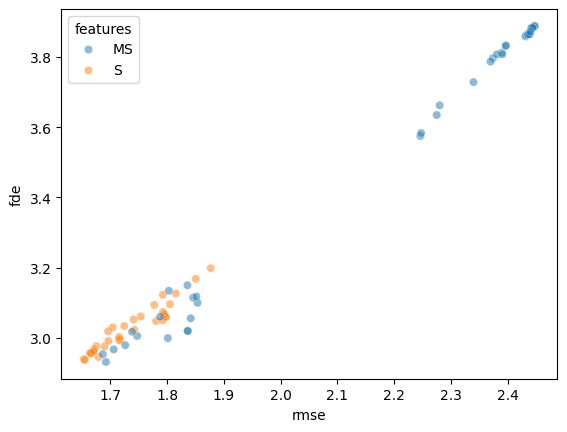

In [ ]:
sns.scatterplot( data = cp_logs_df[cp_query], 
                x = 'rmse', y='fde', alpha = 0.5,
                hue= 'features');

### Local LT_DF

In [ ]:
lt_logs_df = pd.read_csv('./logs/long_term_forecast.csv', index_col = 0)
lt_logs_df['epoch'] = lt_logs_df['epoch'].fillna(-1).astype(int)
lt_logs_df['fit_time'] = np.round(lt_logs_df['fit_time'],2)
start_index = 232
loc_query = (lt_logs_df['model_id'] == model_id)&(lt_logs_df['fde'].isna() == False)&(lt_logs_df.index >= start_index)
lt_logs_df[loc_query][['model','features','input_features','seq_len', 'pred_len','lstm_layers','e_layers','d_model', 'd_layers', 'd_ff',
       'dropout', 'learning_rate', 'train_epochs', 'epoch','fde','rmse','nb_params', 'fit_time']].sort_values('fde').head(20)

,model,features,input_features,seq_len,pred_len,lstm_layers,e_layers,d_model,d_layers,d_ff,dropout,learning_rate,train_epochs,epoch,fde,rmse,nb_params,fit_time
306,ST_GAT,MS,A,32,32,2,1,32,1,64,0.10,0.0010,36,19,2.824565,1.696490,62400,1123.80
276,SABFormer,MS,A,32,32,2,2,256,1,512,0.10,0.0010,36,17,2.849299,1.627774,6056608,1614.22
301,ST_GAT,MS,A,32,32,1,1,64,1,128,0.10,0.0010,36,8,2.871921,1.629723,201952,9851.04
302,ST_GAT,MS,A,32,32,1,1,64,1,128,0.25,0.0010,36,8,2.884434,1.645133,201952,5529.70
309,ST_GAT,MS,A,32,32,2,1,32,2,32,0.10,0.0010,36,21,2.920432,1.667500,60640,6802.48
308,ST_GAT,MS,A,32,32,1,1,128,2,256,0.10,0.0010,36,13,2.921957,1.661680,839840,6275.89
238,iTransformer,S,A,32,32,2,2,256,1,512,0.10,0.0010,36,35,2.938396,1.653507,1071392,114.67
310,ST_GAT,MS,A,32,32,2,2,64,2,64,0.10,0.0010,36,20,2.941844,1.726206,303328,7333.92
250,Transformer,MS,A,32,32,2,1,128,1,128,0.25,0.0010,36,7,2.946575,1.711822,1589377,306.81
234,Transformer,S,A,32,32,2,2,256,1,512,0.10,0.0010,36,34,2.954257,1.663159,4446721,298.62


### Scoring baselines

In [ ]:
usc_args = SimpleNamespace(**lt_logs_df.loc[207].to_dict())
usc_args.seq_len = seq_len
usc_args.pred_len = pred_len
usc_args.scale = False
uscds, uscdl = data_provider(args= usc_args, flag = 'test', )
uscds.data_x.shape, uscds.data_y.shape

test 4233


((4233, 32, 1), (4233, 32, 1))

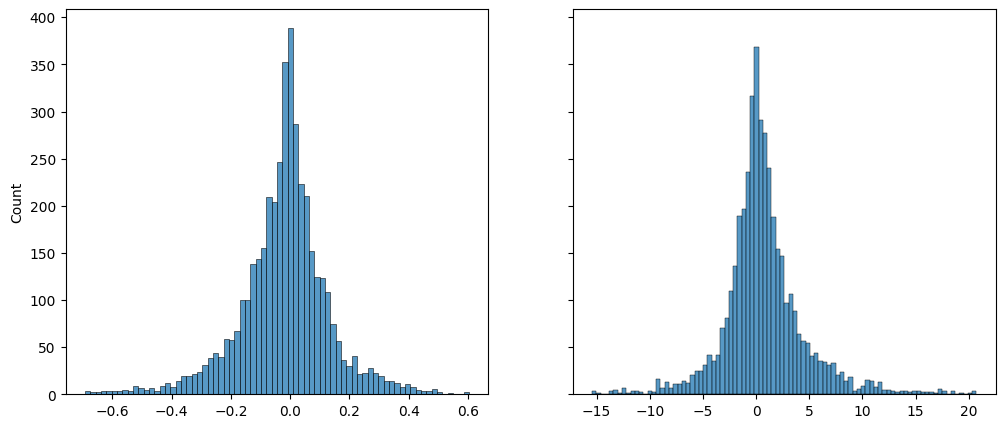

In [ ]:
tmp = uscds.data_x[:,-1,0] -  uscds.data_y[:,0,0]
fig, axs = plt.subplots(1,2,figsize = (12,5), sharey=True)
sns.histplot(tmp, ax = axs[0]);
sns.histplot(uscds.data_y[:,-1,0], ax = axs[1]);


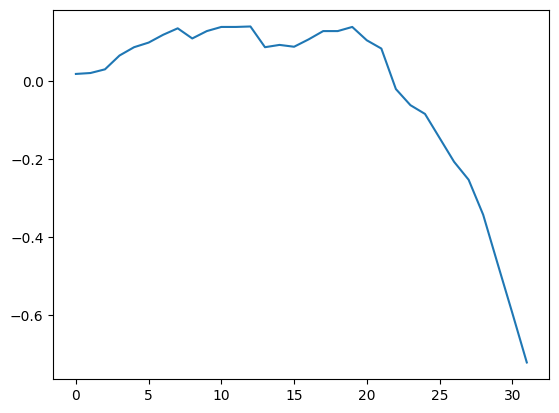

In [ ]:
sns.lineplot(uscds.data_y[6,:,0]);

In [ ]:
uscds.data_x[0,-5:,0] , uscds.data_y[0,:5,0]

(array([-0.5815458 , -0.4777832 , -0.3362279 , -0.13446379,  0.        ],
       dtype=float32),
 array([0.17934847, 0.41184092, 0.6160221 , 0.8721256 , 1.0302544 ],
       dtype=float32))

In [ ]:
x,y = uscds.data_x, uscds.data_y

In [ ]:
ind = 0
x[ind,-5:,0], y[ind,usc_args.label_len:usc_args.label_len+5,0]

(array([-0.5815458 , -0.4777832 , -0.3362279 , -0.13446379,  0.        ],
       dtype=float32),
 array([2.177392 , 2.1703014, 2.1655731, 2.1820927, 2.18682  ],
       dtype=float32))

In [ ]:
ss_fde = np.sqrt(np.mean(uscds.data_y[:,-1,0]**2))
ss_rmse = np.sqrt(np.mean(uscds.data_y[:,:,0]**2))
ss_fde, ss_rmse

(3.8998787, 2.452531)

In [ ]:
bl_cv_delta = uscds.data_x[:,-1,0] - uscds.data_x[:,-2,0]
bl_cv_pred = np.repeat(uscds.data_x[:,-1,0].reshape(-1,1,1), y.shape[1], axis=1)
for i in range(y.shape[1]):
    bl_cv_pred[:,i,0] = (i+1) * bl_cv_delta 
cv_fde = np.sqrt(np.mean( (uscds.data_y[:,-1,0] - bl_cv_pred[:,-1,0])**2 ))
cv_rmse = np.sqrt(np.mean( (uscds.data_y[:,:,0] - bl_cv_pred[:,:,0])**2 ))
cv_fde, cv_rmse

(3.9323, 2.0943015)

In [ ]:
bls = [{'model':'Baseline - StandStill', 'features':'S','fde':ss_fde, 'rmse':ss_rmse},
       {'model':'Baseline - ConstantVelocity', 'features':'S','fde':cv_fde, 'rmse': cv_rmse}]

### Comparison

In [ ]:
columns = ['model','features','fde','rmse']
tmp_df = pd.concat([lt_logs_df[loc_query][columns].copy(), cp_logs_df[cp_query][columns].copy()]).reset_index(drop=True)
tmp_df.sort_values(by = 'fde', inplace=True)
tmp_df['dupl'] = tmp_df[['model','features']].duplicated()
tmp_df=tmp_df[tmp_df['dupl'] == False]

comp = pd.concat([tmp_df.drop(columns = 'dupl'), pd.DataFrame(bls)]).reset_index(drop=True)
comp.sort_values(by = 'fde').round(2)

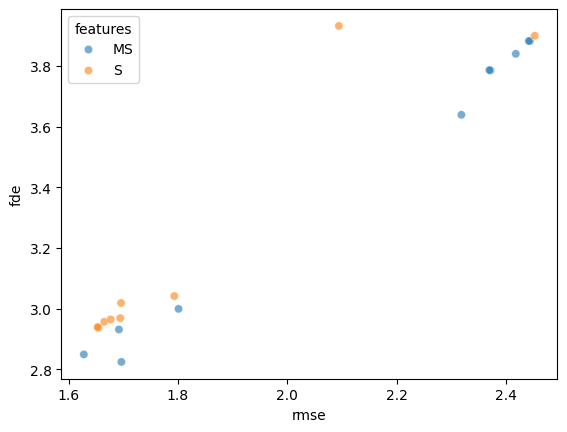

In [ ]:
sns.scatterplot(data=comp, x = 'rmse', y = 'fde', hue = 'features', alpha = 0.6);